####  결정트리 알고리즘 기반 모델
- 데이터셋의 피쳐(특성)을 기준으로 데이터를 분류하는 알고리즘
- 질문방식으로 Yes/No 결과에 따라 데이터셋 분리가 됨
- 장점 : 스케일링이나 정규화 불필요 ==> 성능의 영향이 없음, 쉬운 알고리즘
- 단점 : 과대적합 ===> 해결을 위한 많은 하이퍼파라미터 존재!!
- 다른 ML 알고리즘에 비해 성능이 좋지 않음 ==> 단! 여러개의 DT라 모이면 성능 강해짐
    * 앙상블에 주로 사용됨!

[1] 모듈로딩 및 데이터 준비

In [1]:
# 모듈로딩
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_iris

In [2]:
# 데이터 로딩
featureDF, targetSR = load_iris(as_frame=True, return_X_y=True)

print(f'featureDF : {featureDF.shape}, {featureDF.ndim}D')
print(f'targetSR  : {targetSR.shape}, {targetSR.ndim}D')

featureDF : (150, 4), 2D
targetSR  : (150,), 1D


[2] 학습용 데이터셋 준비

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, 
                                                    targetSR,
                                                    random_state=10,
                                                    stratify=targetSR)

In [5]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D    y_train : {y_train.shape}, {y_train.ndim}D')
print(f'X_test  : {X_test.shape}, {X_test.ndim}D     y_test  : {y_test.shape}, {y_test.ndim}D')

X_train : (112, 4), 2D    y_train : (112,), 1D
X_test  : (38, 4), 2D     y_test  : (38,), 1D


[3] 학습 - 기본 학습

In [6]:
# 모델 인스턴스 생성
dt_model = DecisionTreeClassifier(max_features=2)
dt_model.fit(X_train , y_train)

DecisionTreeClassifier(max_features=2)

In [7]:
# 모델 파라미터 : 학습fit() 후에 학습용 데이터셋을 기반으로 설정된 값들
print(f'[dt_model.classes_] {dt_model.classes_}')
print(f'[dt_model.n_classes_] {dt_model.n_classes_}개')
print(f'[dt_model.max_features_] {dt_model.max_features_}개')
print(f'[dt_model.feature_names_in_] {dt_model.feature_names_in_}')
print(f'[dt_model.feature_importances_] {dt_model.feature_importances_}')


[dt_model.classes_] [0 1 2]
[dt_model.n_classes_] 3개
[dt_model.max_features_] 2개
[dt_model.feature_names_in_] ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']
[dt_model.feature_importances_] [0.04834569 0.         0.07737703 0.87427728]


- 성능 체크

In [8]:
# 학습용 데이터셋에 대한 성능
train_score = dt_model.score(X_train, y_train)

# 테스트용 데이터셋에 대한 성능
test_score = dt_model.score(X_test, y_test)

In [9]:
print(f'train_score : test_score = {train_score} : {test_score}')

train_score : test_score = 1.0 : 0.9736842105263158


[4] 교차검증 => 데이터셋 부족 해결 및 과대적합을 회피

In [10]:
from sklearn.model_selection import StratifiedKFold , cross_validate

In [11]:
# 교차검증 준비 ==> 모델 인스턴스, trainDS, cv=5 [기본]
dt_model2 = DecisionTreeClassifier(random_state=1)
result=cross_validate(  dt_model2, X_train, y_train,
                        return_train_score=True, 
                        return_estimator=True)

In [12]:
#dict => DataFrame
resultDF=pd.DataFrame(result)

In [13]:
resultDF

,fit_time,score_time,estimator,test_score,train_score
0,0.002767,0.002000,DecisionTreeClassifier(random_state=1),0.956522,1.0
1,0.003094,0.001452,DecisionTreeClassifier(random_state=1),0.956522,1.0
2,0.002075,0.001533,DecisionTreeClassifier(random_state=1),0.954545,1.0
3,0.001337,0.001560,DecisionTreeClassifier(random_state=1),0.863636,1.0
4,0.002016,0.000983,DecisionTreeClassifier(random_state=1),0.909091,1.0


[5] 성능 향상 위한 튜닝 ==> 하이퍼파라미터 설정
- 단점 : 과대적합
    * max_depth , min_samples_leaf, .... ==> 많음

In [14]:
from sklearn.model_selection import GridSearchCV 

In [15]:
# 하이퍼파라미터 dit 생성
parmas={'max_depth':[8,6], 
        'min_samples_leaf':[7,6,5],
        'max_features':[11,9,7,5]}

# ===> model1 => 'max_depth':[8], 'min_samples_leaf':[7], 'max_features':[11]
# ===> model1 => 'max_depth':[8], 'min_samples_leaf':[7], 'max_features':[9]
# ===> model1 => 'max_depth':[8], 'min_samples_leaf':[7], 'max_features':[7]
# ===> model1 => 'max_depth':[8], 'min_samples_leaf':[7], 'max_features':[5]

# ===> model1 => 'max_depth':[8], 'min_samples_leaf':[6], 'max_features':[11]
# ===> model1 => 'max_depth':[8], 'min_samples_leaf':[6], 'max_features':[9]
# ===> model1 => 'max_depth':[8], 'min_samples_leaf':[6], 'max_features':[7]
# ===> model1 => 'max_depth':[8], 'min_samples_leaf':[6], 'max_features':[5]

# ===> model1 => 'max_depth':[8], 'min_samples_leaf':[5], 'max_features':[11]
# ===> model1 => 'max_depth':[8], 'min_samples_leaf':[5], 'max_features':[9]
# ===> model1 => 'max_depth':[8], 'min_samples_leaf':[5], 'max_features':[7]
# ===> model1 => 'max_depth':[8], 'min_samples_leaf':[5], 'max_features':[5]

# ===> model1 => 'max_depth':[6], 'min_samples_leaf':[7], 'max_features':[11]
# ===> model1 => 'max_depth':[6], 'min_samples_leaf':[7], 'max_features':[9]
# ===> model1 => 'max_depth':[6], 'min_samples_leaf':[7], 'max_features':[7]
# ===> model1 => 'max_depth':[6], 'min_samples_leaf':[7], 'max_features':[5]

# ===> model1 => 'max_depth':[6], 'min_samples_leaf':[6], 'max_features':[11]
# ===> model1 => 'max_depth':[6], 'min_samples_leaf':[6], 'max_features':[9]
# ===> model1 => 'max_depth':[6], 'min_samples_leaf':[6], 'max_features':[7]
# ===> model1 => 'max_depth':[6], 'min_samples_leaf':[6], 'max_features':[5]

# ===> model1 => 'max_depth':[6], 'min_samples_leaf':[5], 'max_features':[11]
# ===> model1 => 'max_depth':[6], 'min_samples_leaf':[5], 'max_features':[9]
# ===> model1 => 'max_depth':[6], 'min_samples_leaf':[5], 'max_features':[7]
# ===> model1 => 'max_depth':[6], 'min_samples_leaf':[5], 'max_features':[5]


In [16]:
gscv=GridSearchCV(DecisionTreeClassifier(), 
                  param_grid=parmas, 
                  refit=True, 
                  return_train_score=True)
gscv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 6], 'max_features': [11, 9, 7, 5],
                         'min_samples_leaf': [7, 6, 5]},
             return_train_score=True)

In [17]:
# 모델 파라미터 
print(f'[gscv.best_params_]     {gscv.best_params_}')
print(f'[gscv.best_score_]      {gscv.best_score_}')
print(f'[gscv.best_estimator_]  {gscv.best_estimator_}')
#print(f'[gscv.cv_results_]\n    {gscv.cv_results_}')

[gscv.best_params_]     {'max_depth': 8, 'max_features': 11, 'min_samples_leaf': 7}
[gscv.best_score_]      0.9284584980237154
[gscv.best_estimator_]  DecisionTreeClassifier(max_depth=8, max_features=11, min_samples_leaf=7)


In [18]:
cv_resultDF=pd.DataFrame(gscv.cv_results_)
cv_resultDF.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_min_samples_leaf',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [19]:
diffscoreDF=cv_resultDF[['mean_test_score', 'mean_train_score']].copy()
diffscoreDF['diff']=abs(diffscoreDF.loc[:, 'mean_test_score'] - diffscoreDF.loc[:, 'mean_train_score'])

diffscoreDF

,mean_test_score,mean_train_score,diff
0,0.928458,0.950886,0.022428
1,0.919368,0.950886,0.031519
2,0.928458,0.957553,0.029095
3,0.928458,0.950886,0.022428
4,0.919368,0.950886,0.031519
5,0.928458,0.957553,0.029095
6,0.928458,0.950886,0.022428
7,0.919368,0.950886,0.031519
8,0.928458,0.953109,0.024650
9,0.928458,0.950886,0.022428


- 주요 피쳐 시각화

In [20]:
## 가장 좋은 모델
best_model=gscv.best_estimator_
print(f'[best_model.max_depth]  {best_model.max_depth}')
print(f'[best_model.min_samples_leaf]  {best_model.min_samples_leaf}')

[best_model.max_depth]  8
[best_model.min_samples_leaf]  7


In [21]:
# 피쳐 중요도 및 개수 
best_model.feature_importances_, best_model.n_features_in_, best_model.feature_names_in_

(array([0.00669645, 0.        , 0.04225797, 0.95104558]),
 4,
 array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
        'petal width (cm)'], dtype=object))

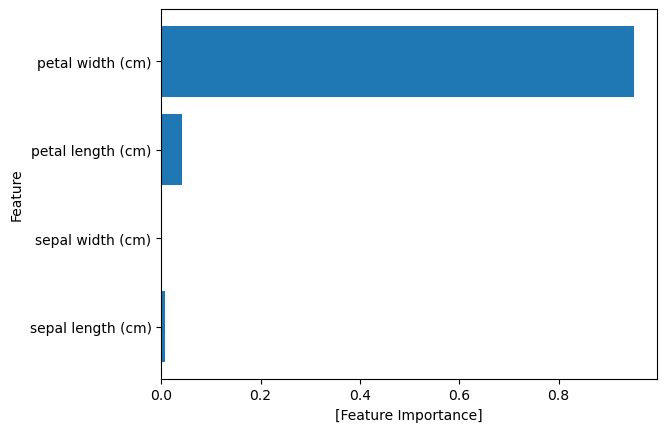

In [22]:
import matplotlib.pyplot as plt 

plt.barh(range(best_model.n_features_in_), best_model.feature_importances_, align='center')
plt.yticks(np.arange(best_model.n_features_in_), best_model.feature_names_in_)
plt.xlabel("[Feature Importance]")
plt.ylabel("Feature")
plt.show()

- DT 그래프 시각화 
    * Graphviz 프로그램(OS에 맞는 버전) 설치 + python용 패키지 graphviz 설치

In [23]:
## (1) DT모델을 dot포맷의 파일로 저장 ==> export_graphviz() 
from sklearn.tree import export_graphviz 

export_graphviz(best_model, 
                out_file='tree.dot', 
                class_names=['setosa', 'versicolor', 'verginica'],
                feature_names=best_model.feature_names_in_, 
                impurity=True, filled=True, rounded=True )

In [24]:
## (2) dot파일 출력
import graphviz 

# 파일에서 데이터 읽어오기
with open('tree.dot') as f: 
    dot_data=f.read()

# 화면에 출력하기
graphviz.Source(dot_data)

ModuleNotFoundError: No module named 'graphviz'

[6] 새로운 데이터 예측

In [ ]:
new_data=featureDF.iloc[:1]+0.21
new_data.shape

(1, 4)

In [ ]:
best_model.predict(new_data)

array([0])

In [ ]:
best_model.predict_proba(new_data)

array([[1., 0., 0.]])